<a href="https://colab.research.google.com/github/kow71/Bank_Churn/blob/master/Bank_Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imblearn
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE

In [4]:
link = 'https://github.com/kow71/Bank_Churn/blob/master/Bank_Customer_Churn.csv'

path = 'https://raw.githubusercontent.com/' + '/'.join(link.split('/')[3:5]) + '/' + '/'.join(link.split('/')[6:])

df = pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  bool   
 9   active_member     10000 non-null  bool   
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 732.5+ KB


In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698,Spain,Female,39,9,161993.89060,1,False,False,90212.38281,False
1,15565706,612,Spain,Male,35,1,0.00000,1,True,True,83256.25781,True
2,15565714,601,France,Male,47,1,64430.05859,2,False,True,96517.96875,False
3,15565779,627,Germany,Female,30,6,57809.32031,1,True,False,188258.48440,False
4,15565796,745,Germany,Male,48,10,96048.54688,1,True,False,74510.64844,False


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [9]:
def data_label():
  for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2.,
                    p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 4),
                   textcoords = 'offset points')

<Axes: ylabel='count'>

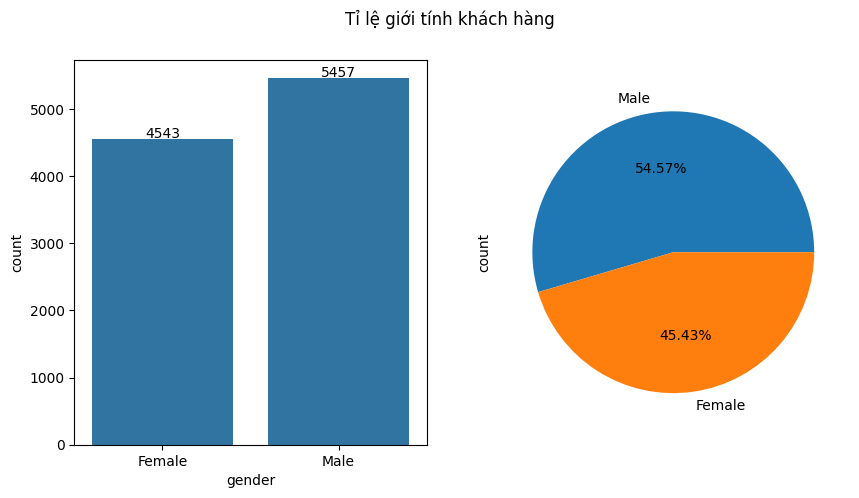

In [10]:
plt.figure(figsize= (10, 5))
plt.suptitle('Tỉ lệ giới tính khách hàng')
plt.subplot(1, 2, 1)
sns.countplot(x="gender", data =df)
data_label()
plt.subplot(1, 2, 2)
df["gender"].value_counts().plot.pie(autopct='%1.2f%%')

<Axes: xlabel='age'>

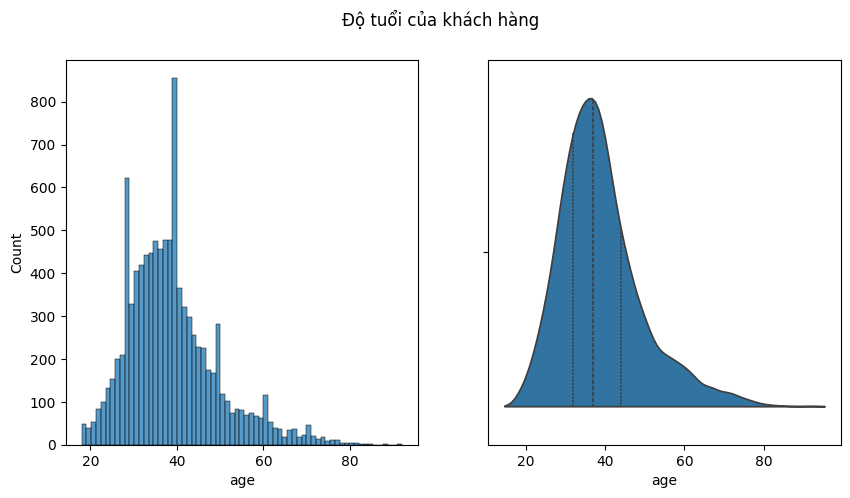

In [11]:
plt.figure(figsize = (10, 5))
plt.suptitle("Độ tuổi của khách hàng")
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = "age")
plt.subplot(1, 2, 2)
sns.violinplot(data = df, x = "age", split= True, inner= 'quart')


<Axes: ylabel='count'>

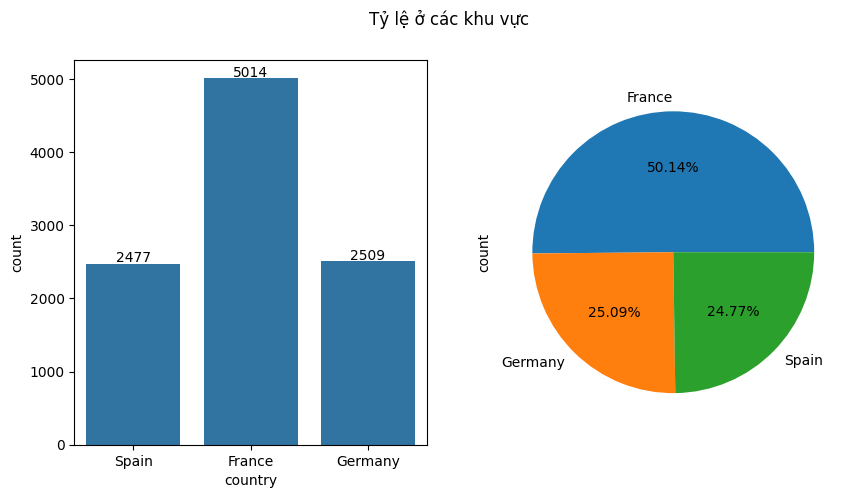

In [12]:
plt.figure (figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.suptitle("Tỷ lệ ở các khu vực")
sns.countplot(data = df, x = "country")
data_label()
plt.subplot(1, 2, 2)
df["country"].value_counts().plot.pie(autopct="%.2f%%")

<Axes: ylabel='count'>

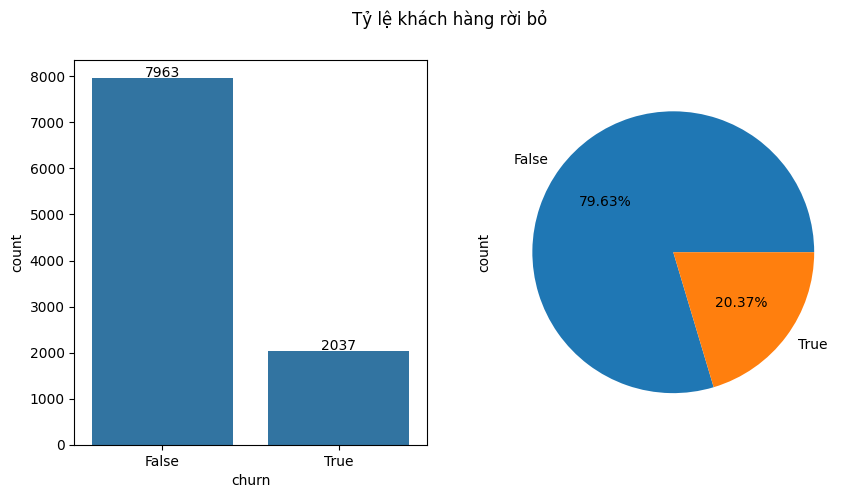

In [13]:
plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
plt.suptitle('Tỷ lệ khách hàng rời bỏ')
sns.countplot(x="churn", data =df)
data_label()
plt.subplot(1, 2, 2)
df["churn"].value_counts().plot.pie(autopct= "%.2f%%")


In [14]:
df.nunique()

,0
customer_id,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


<Axes: title={'center': 'Độ tuổi khách hàng rời bỏ'}, xlabel='age'>

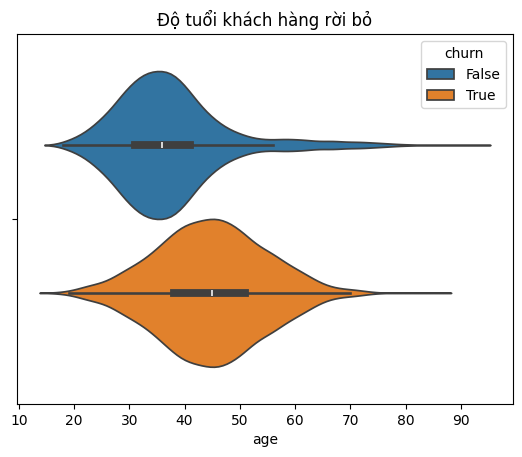

In [15]:
plt.title("Độ tuổi khách hàng rời bỏ")
sns.violinplot(data= df, x= "age", hue= "churn")

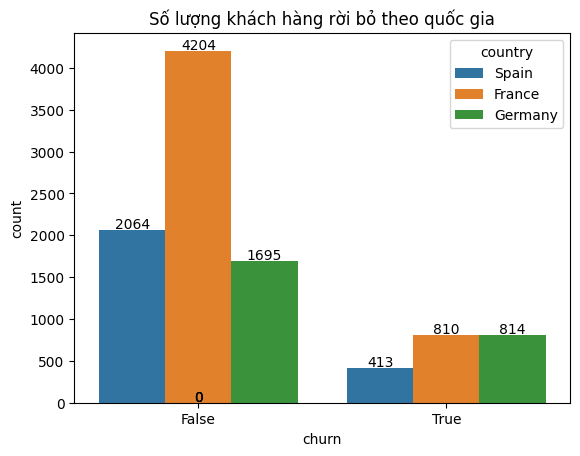

In [16]:
sns.countplot(data = df, x = "churn", hue = "country")
plt.title("Số lượng khách hàng rời bỏ theo quốc gia")
data_label()

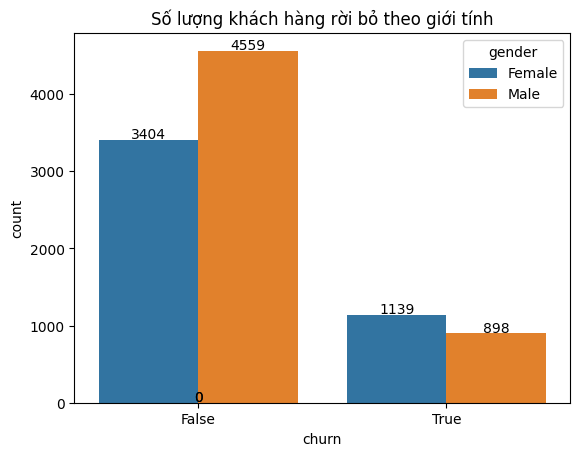

In [17]:
sns.countplot(data = df, x = "churn", hue = "gender")
plt.title("Số lượng khách hàng rời bỏ theo giới tính")
data_label()

<Axes: xlabel='balance'>

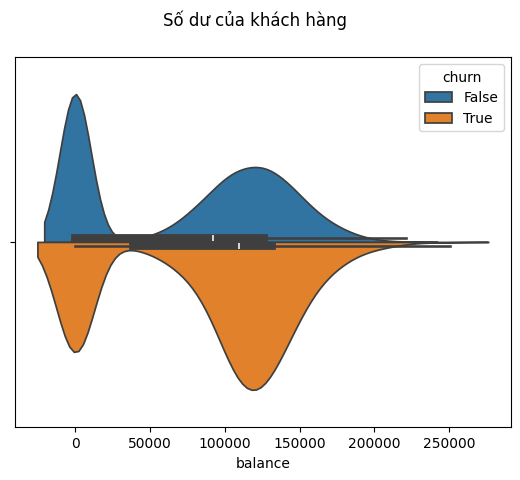

In [18]:
plt.suptitle("Số dư của khách hàng")
sns.violinplot(data= df, x= "balance", hue= "churn", split= True )


<ipython-input-19-f3e91faac222>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = "products_number", y = "age", palette= "bright")


<Axes: xlabel='products_number', ylabel='count'>

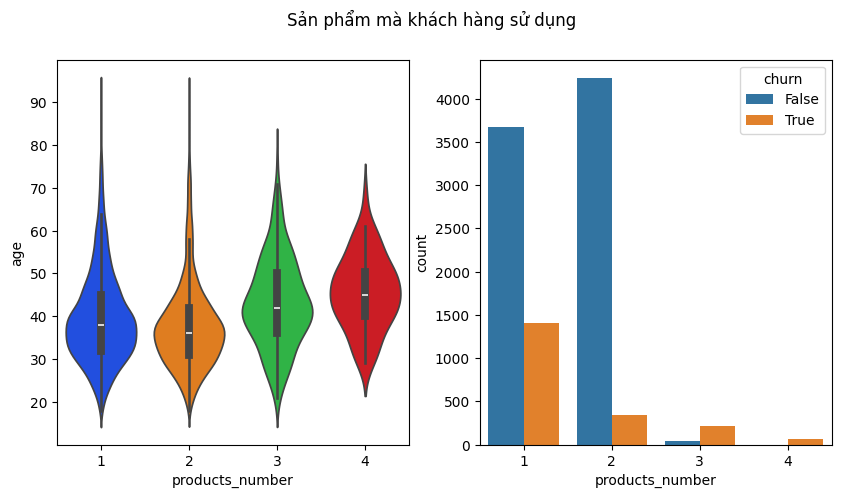

In [19]:
plt.figure(figsize = (10, 5))
plt.suptitle("Sản phẩm mà khách hàng sử dụng")
plt.subplot(1, 2, 1)
sns.violinplot(data = df, x = "products_number", y = "age", palette= "bright")
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = "products_number", hue = "churn")

<Axes: xlabel='active_member', ylabel='count'>

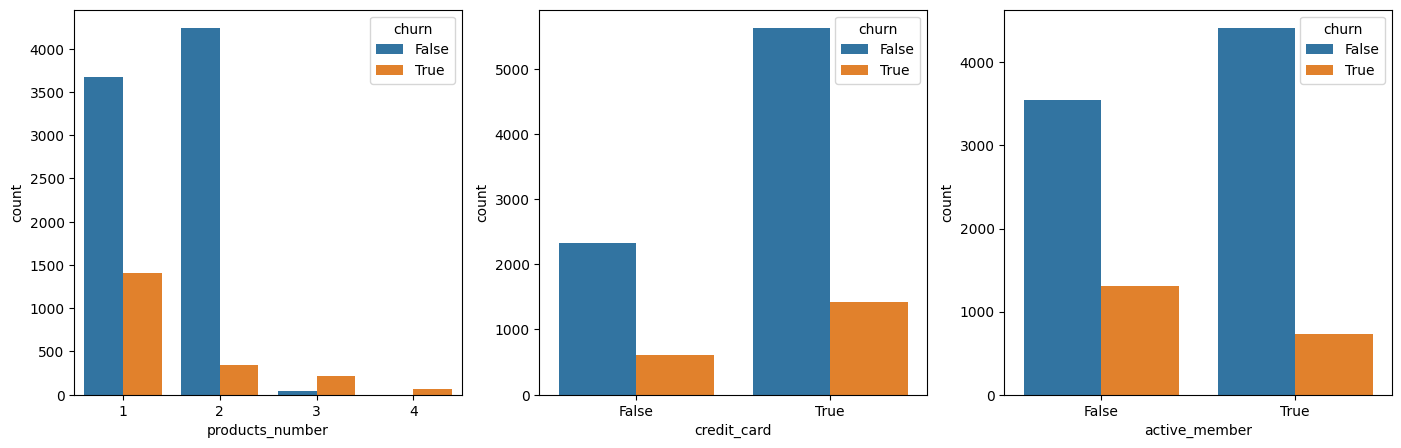

In [20]:
plt.figure(figsize= (17, 5))
plt.subplot(1, 3, 1)
sns.countplot(data= df, x= "products_number", hue= "churn")
plt.subplot(1, 3, 2)
sns.countplot(data= df, x= "credit_card", hue= "churn")
plt.subplot(1, 3, 3)
sns.countplot(data= df, x="active_member", hue="churn")

<Axes: xlabel='credit_score'>

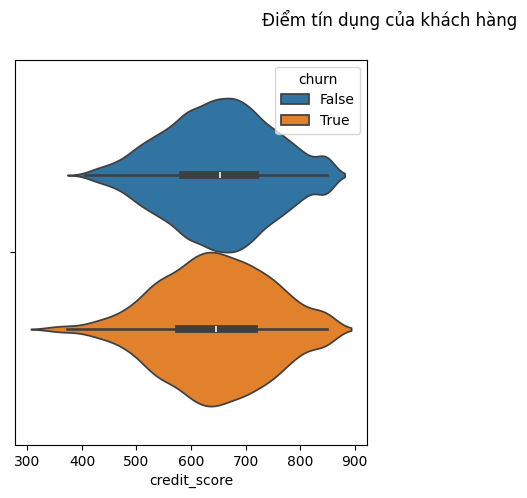

In [21]:
plt.figure(figsize = (10, 5))
plt.suptitle("Điểm tín dụng của khách hàng")
plt.subplot(1, 2, 1)
sns.violinplot(data = df, x = "credit_score", hue = "churn")

## Mô hình




In [22]:
df = df.drop(columns= "customer_id")

In [23]:
X = df.drop(columns= "churn")
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [24]:
preprocessor = ColumnTransformer([
    ("ordinal", OrdinalEncoder(), ["gender", "country"]),
    ("scaler", MinMaxScaler(), ["estimated_salary", "balance", "credit_score", "age"])], remainder= "passthrough")
preprocessor.fit_transform(X)

array([[0.0, 2.0, 0.45104707912324016, ..., 1, False, False],
       [1.0, 2.0, 0.41626313302164814, ..., 1, True, True],
       [1.0, 0.0, 0.482578019334337, ..., 2, False, True],
       ...,
       [0.0, 1.0, 0.9990779589653666, ..., 1, True, True],
       [0.0, 0.0, 0.3036155417549743, ..., 1, True, True],
       [0.0, 2.0, 0.38892427276195923, ..., 1, True, True]], dtype=object)

In [25]:
def trainning_eval (model):
  pipeline = make_pipeline(
      preprocessor,
      SMOTE(),
      model
  )

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  accuracy = metrics.accuracy_score(y_pred, y_test)
  f1_score = metrics.f1_score(y_pred, y_test)

  print(f"MODEL: {model}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"f1_score: {f1_score:.2f}")

  print(metrics.classification_report(y_test, y_pred))

  #cm= metrics.confusion_matrix(y_test, y_pred)
  #sns.heatmap(cm, annot= True, cmap= "Blues")

  return model

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV


def plot_confusion_matrix(y_test, y_pred, ax):
    labels = ['Not churn', 'churn']
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels,
                ax=ax)

    ax.set_xlabel('Prediction')
    ax.set_ylabel('True Label')
    ax.set_title(f"Confusion Matrix")

def plot_roc_auc(y_test, y_pred, ax):
    # Compute ROC curve and AUC score
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    ax.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    ax.plot([0, 1], [0, 1], 'k--')
    # ax.xlim([0, 1])
    # plt.ylim([0, 1])
    ax.legend([f'AUC score: {auc:.3f}', 'Base AUC 0.5'])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')

def plot_cm_and_roc(y_test, y_pred):
    # Hàm vẽ confusion matrix và ROC curve
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes = axes.ravel()
    plot_confusion_matrix(y_test, y_pred, axes[0])
    plot_roc_auc(y_test, y_pred, axes[1])

In [27]:
def train_and_eval (model):
  pipeline = make_pipeline(
      preprocessor,
      SMOTE(),
      model
  )

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  accuracy = metrics.accuracy_score(y_pred, y_test)
  f1_score = metrics.f1_score(y_pred, y_test)

  print(f"MODEL: {model}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"f1_score: {f1_score:.2f}")

  print(metrics.classification_report(y_test, y_pred))

  return model

In [28]:
train_and_eval(SVC(C= 1.0, kernel= "rbf"))

MODEL: SVC()
Accuracy: 0.74
f1_score: 0.54
              precision    recall  f1-score   support

       False       0.91      0.74      0.82      1588
        True       0.42      0.73      0.54       412

    accuracy                           0.74      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.81      0.74      0.76      2000



SVC()

              precision    recall  f1-score   support

       False       0.88      0.77      0.82      1588
        True       0.40      0.59      0.48       412

    accuracy                           0.73      2000
   macro avg       0.64      0.68      0.65      2000
weighted avg       0.78      0.73      0.75      2000



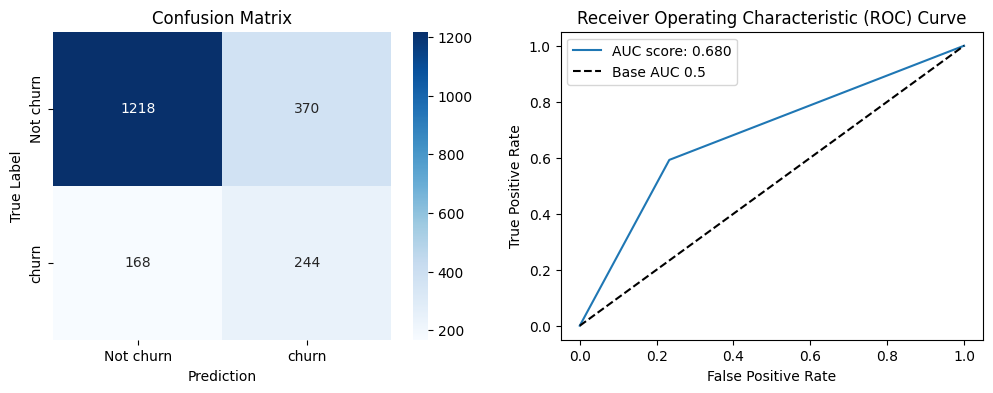

In [29]:
def train_and_eval(model):
    svc_pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('balance', SMOTE()),
        ('model', model)
    ])

    svc_pipeline.fit(X_train, y_train)

    y_pred = svc_pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_cm_and_roc(y_test, y_pred)

train_and_eval(
    KNeighborsClassifier(5)
)

              precision    recall  f1-score   support

       False       0.90      0.70      0.79      1588
        True       0.38      0.70      0.49       412

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000



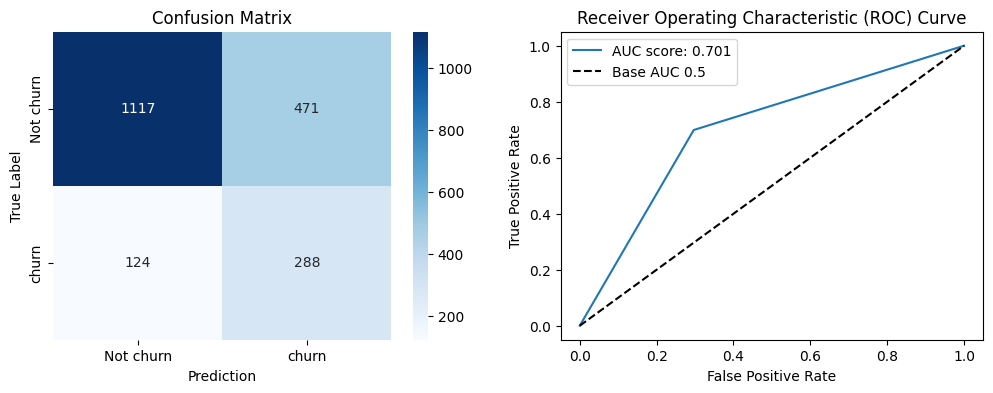

In [30]:
lg_model = LogisticRegression()
train_and_eval(lg_model)



```
## Định dạng của đoạn này là mã
```



#### Decision Tree and Random Forest

              precision    recall  f1-score   support

       False       0.90      0.80      0.85      1588
        True       0.46      0.67      0.54       412

    accuracy                           0.77      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.81      0.77      0.78      2000



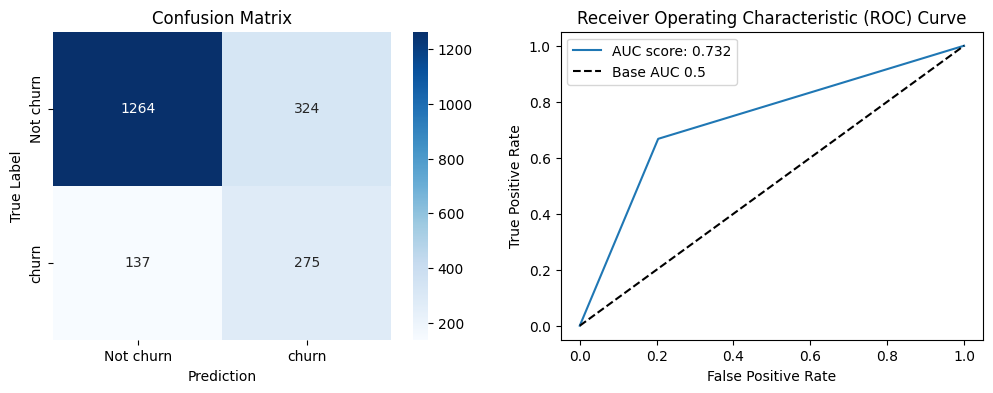

In [31]:
train_and_eval(
    DecisionTreeClassifier(max_depth=10))

              precision    recall  f1-score   support

       False       0.92      0.84      0.88      1588
        True       0.54      0.72      0.62       412

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.82      2000



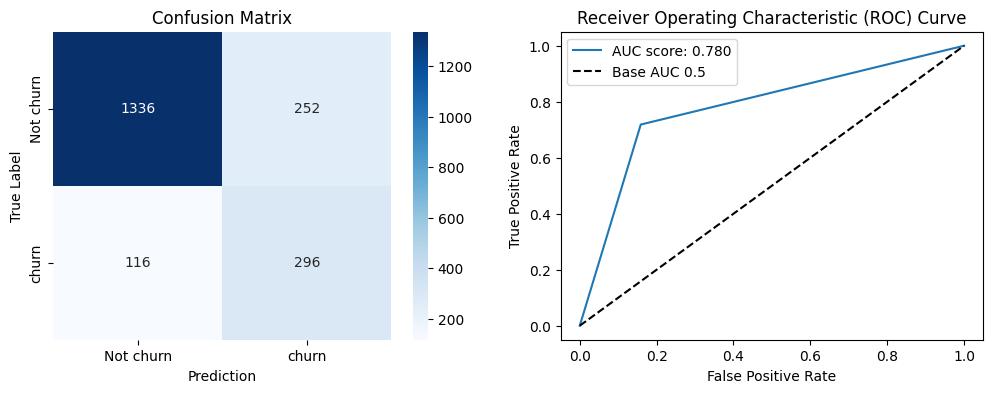

In [32]:
train_and_eval(RandomForestClassifier
 (n_estimators=120, max_depth=10))


#### Boosting Classifier

              precision    recall  f1-score   support

       False       0.92      0.85      0.88      1588
        True       0.55      0.70      0.62       412

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



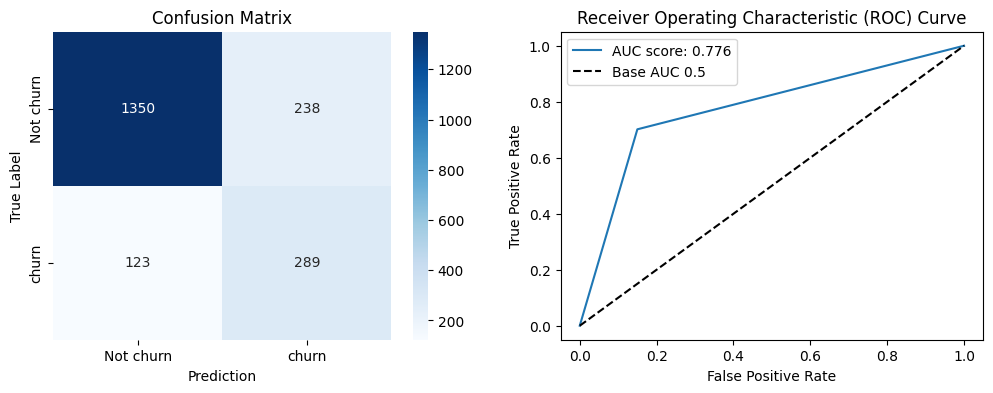

In [33]:
train_and_eval(
    GradientBoostingClassifier(n_estimators=100)
)

In [34]:
lg_model.coef_[0]

array([-6.15250020e-01,  1.07909689e-01,  8.10851443e-02,  1.29617459e+00,
       -4.83921793e-01,  6.31549582e+00, -4.79811751e-03, -1.64161633e-01,
        6.58988037e-02, -9.09508740e-01])

In [35]:
X.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

Text(0, 0.5, 'Đặc điểm của data')

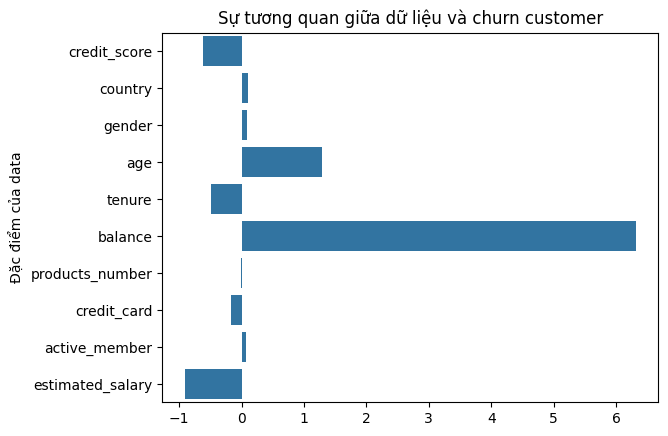

In [37]:
sns.barplot(y= X.columns, x= lg_model.coef_[0])
plt.title("Sự tương quan giữa dữ liệu và churn customer")
plt.ylabel("Đặc điểm của data")